# order of glyphs

1
2
3
4
5
6
7
3
8

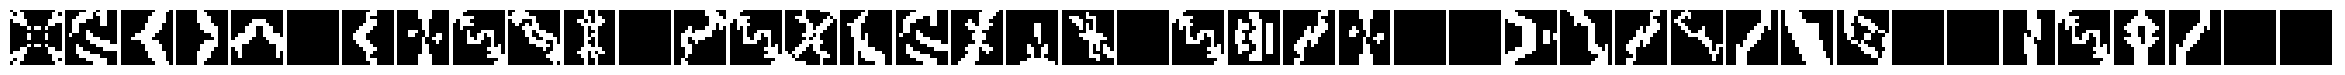

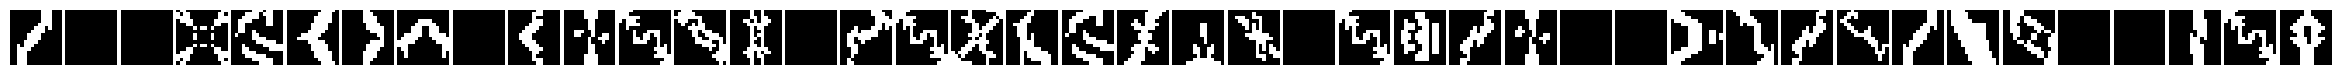

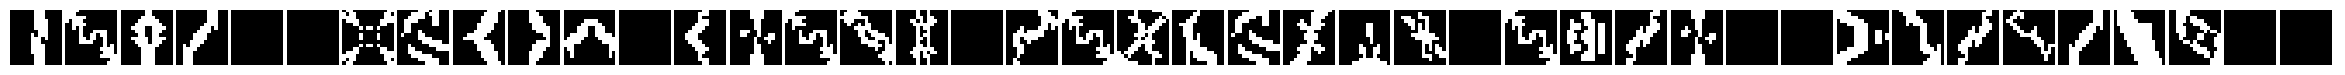

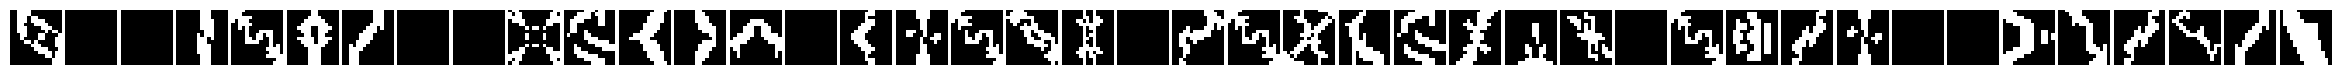

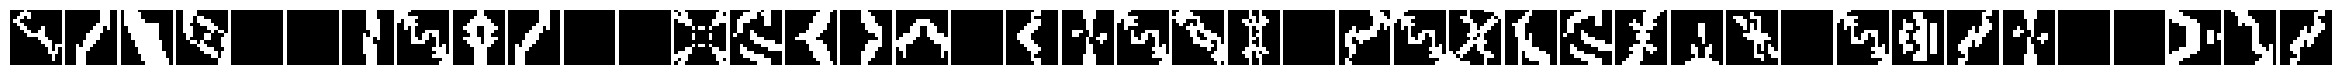

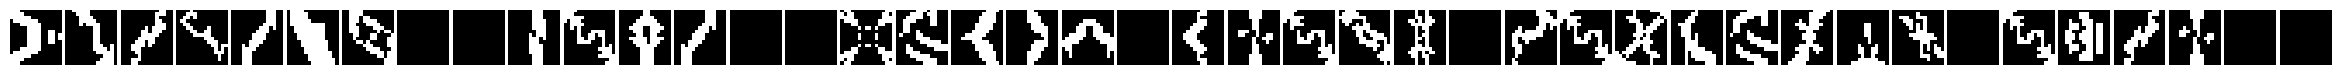

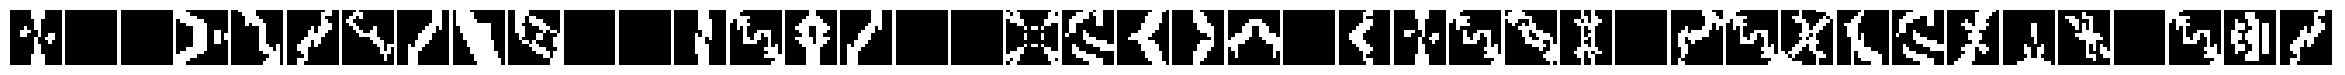

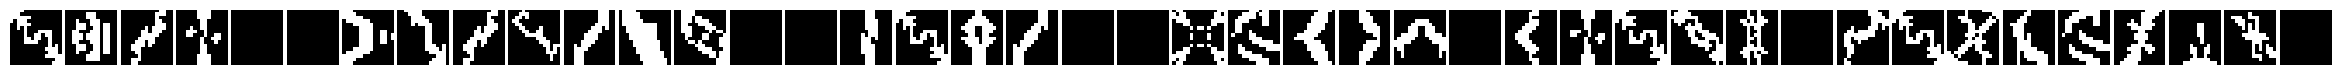

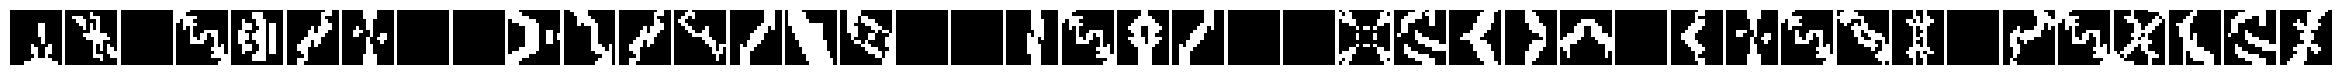

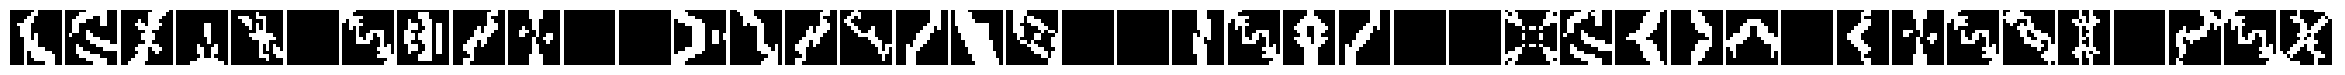

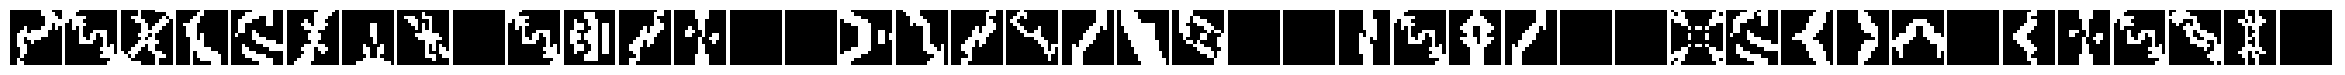

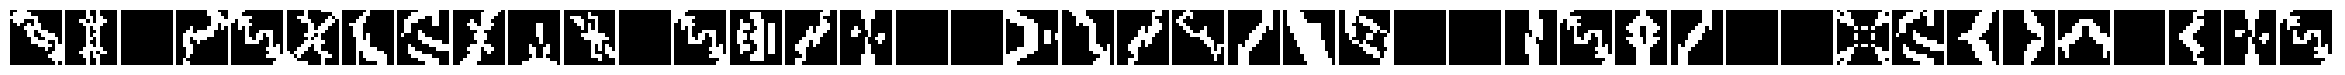

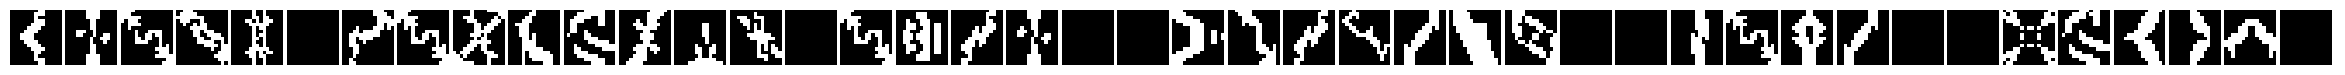

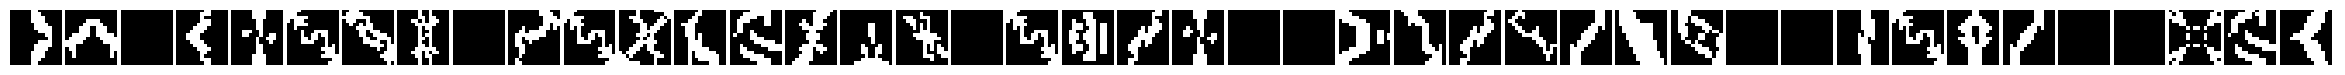

In [8]:
from pathlib import Path
from collections import deque

from PIL import Image
from matplotlib import pyplot as plt
import numpy as np

def convert_img(file):
    im = np.asarray(Image.open(file))

    im_arr = np.asarray(im)
    tol = 30
    yellow = np.all(np.isclose(im_arr , [255,255,0, 255], atol=tol, rtol=0),axis=-1)
    cyan =  np.all(np.isclose(im_arr , [0,255,255,255], atol=tol, rtol=0),axis=-1)
    magenta =  np.all(np.isclose(im_arr , [255,0,255,255], atol=tol, rtol=0),axis=-1)
    green =  np.all(np.isclose(im_arr , [0,255,0,255], atol=tol, rtol=0),axis=-1)
    red =  np.all(np.isclose(im_arr , [255,0,0,255], atol=tol, rtol=0),axis=-1)
    blue =  np.all(np.isclose(im_arr , [0,0,255,255], atol=tol, rtol=0),axis=-1)
    black =  np.all(np.isclose(im_arr , [0,0,0,255], atol=tol, rtol=0),axis=-1)
    cyan |= (green | blue | black)
    magenta |= (red | blue | black)
    yellow |= (red | green | black)
    cyan[:,-1] = 1
    magenta[:,-1] = 1
    yellow[:,-1] = 1
    return cyan, magenta, yellow


p = Path(".")
g = p.glob("glyph*px.png")

list_unsorted = deque()
c_list = deque()
m_list = deque()
y_list = deque()

for file in g:
    c,m,y = convert_img(file)
    list_unsorted.append(c)
    c_list.append(c)
    list_unsorted.append(m)
    m_list.append(m)
    list_unsorted.append(y)
    y_list.append(y)

list_print = list_unsorted.copy()

for i in range(0,len(list_print),3):
    
    sentence = np.hstack(list_print)
    fig = plt.figure(figsize=(30,5))
    plt.imshow(sentence, cmap="grey")
    plt.gca().set_axis_off()
    plt.show()
    list_print.rotate(3)

# sort_key = [1,2,3,4,5, -64, 6,7,8,9,10, -64 , 11,8,12,13,2,14,15,16, -64, 8,17,18,7, -64,-64, 19,20,18,21,22,23,24, -64,-64 ,25,8,26,21 ,-64 ,-64]

# indexes = np.argsort(sort_key)
# list = np.asarray(list_unsorted)[indexes]
# sentence = np.hstack(list)
# fig = plt.figure(figsize=(30,5))
# plt.imshow(sentence, cmap="grey")
# plt.gca().set_axis_off()
# plt.show()

# print("".join([chr(i+96) for i in sort_key]))

In [6]:
import subbreaker

glyph_dict = {"1_0":("a","b","c"), "1_1":("d","e"," "), "2_0":("f","g","h"), "2_1":("i","j"," "), "3_0":("k","h","l"), 
              "4_0":("m","b","n"), "4_1":("o","p"," "), "5_0":("h","q","r"),"5_1":("g", " ", " "), 
              "6_0":("s","t","r"), "7_0":("u","v","w"), "7_1":("x", " ", " "), "8_0":("y","h","z"), "9_0":("u"," ", " ")}

glyph_order_1 = [f"{i+1}_0" for i in range(9)] + [f"{i+1}_1" for i in range(9)] # oder by color
glyph_order_2 = sum([[f"{i+1}_0", f"{i+1}_1"] for i in range(9)],[]) # order by picture
glyph_order_3 = sum([[f"{i+1}_1", f"{i+1}_0"] for i in range(9)],[]) # sawp blinking
glyph_order_4 = [f"{i+1}_1" for i in range(9)] + [f"{i+1}_0" for i in range(9)] # swap blink order

def contruct_cypher(order):
    out_str = ""
    c_str = ""
    m_str = ""
    y_str = ""
    for key in order:
        glyph_symbols = glyph_dict.get(key, ("","",""))
        c_str += glyph_symbols[0]
        m_str += glyph_symbols[1]
        y_str += glyph_symbols[2]
        out_str += "".join(glyph_symbols)
    return out_str, c_str+m_str+y_str

print(contruct_cypher(glyph_order_1))

print(contruct_cypher(glyph_order_2))

print(contruct_cypher(glyph_order_3))

print(contruct_cypher(glyph_order_4))
print()



def rotate_str(string:str, n, replace_letter= None):
    if replace_letter:
        string = string.replace(" ","ü").replace(replace_letter, " ").replace("ü", replace_letter) #  if space is actually a letter
    return string[n:] + string[:n]

from concurrent.futures import ProcessPoolExecutor, as_completed
import io
import asyncio


def background(f):
    def wrapped(*args, **kwargs):
        return asyncio.get_event_loop().run_in_executor(None, f, *args, **kwargs)
    return wrapped

with open("./EN.json") as f:
    breaker = subbreaker.Breaker(f)

breaker_info = breaker.info

def break_cypher(cypher1, breaker):

    # print(cypher1)
    result1 = breaker.break_cipher(cypher1)
    res = cypher1 + " | " + result1.plaintext + " - " + str(result1.fitness) + "\n"
    return  res


fullt_rots1 = [ rotate_str(contruct_cypher(glyph_order_3)[0],i*3, letter)+ "\n" for i in range(0,len(glyph_dict)) for letter in " abcdefghijklmnopqrstuvwxyz"]
with open("input1.txt", "w") as f:
    f.writelines(fullt_rots1)
# for rot in fullt_rots1:
#     # print(rot)
#     print(break_cypher(rot, breaker))

fullt_rots1 = [ rotate_str(contruct_cypher(glyph_order_3)[1],i*3, letter) + "\n" for i in range(0,len(glyph_dict)) for letter in " abcdefghijklmnopqrstuvwxyz"]
with open("input2.txt", "w") as f:
    f.writelines(fullt_rots1)
    
fullt_rots2 = [ rotate_str(contruct_cypher(glyph_order_2)[0],i*3, letter) + "\n" for i in range(0,len(glyph_dict)) for letter in " abcdefghijklmnopqrstuvwxyz"]
with open("input3.txt", "w") as f:
    f.writelines(fullt_rots2)

fullt_rots2 = [ rotate_str(contruct_cypher(glyph_order_2)[1],i*3, letter)+ "\n" for i in range(0,len(glyph_dict)) for letter in " abcdefghijklmnopqrstuvwxyz"]
with open("input4.txt", "w") as f:
    f.writelines(fullt_rots2)



('abcfghkhlmbnhqrstruvwyhzu  de ij op g  x  ', 'afkmhsuyudiogxbghbqtvh ejp  chlnrrwz      ')
('abcde fghij khlmbnop hqrg  struvwx  yhzu  ', 'adfikmohgsuxyubegjhbpq tv h c h ln r rw z ')
('de abcij fghkhlop mbng  hqrstrx  uvwyhzu  ', 'daifkomghsxuyuebjghpb qt vh  c hl n rr wz ')
('de ij op g  x  abcfghkhlmbnhqrstruvwyhzu  ', 'diogxafkmhsuyuejp  bghbqtvh      chlnrrwz ')



In [1]:
import subprocess

def run_cmd(cmd):
    process = subprocess.Popen(cmd, stdout=subprocess.PIPE, stderr=subprocess.PIPE, cwd="./", shell=True)
    return process
processes = []

processes.append(run_cmd("python eval.py -i input1.txt -o output1.txt"))
processes.append(run_cmd("python eval.py -i input2.txt -o output2.txt"))
processes.append(run_cmd("python eval.py -i input3.txt -o output3.txt"))
processes.append(run_cmd("python eval.py -i input4.txt -o output4.txt"))

for p in processes:
    # p.communicate()
    p.wait()
    # print(p.stdout.read())

# ret = subprocess.check_output("python eval.py -i input1.txt -o output1.txt", cwd="./", shell=True)
# print(ret.decode())